In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#load dataset
df=pd.read_excel("C:/Users/siva Bharathi/OneDrive/Desktop/Python/Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
data=df.copy(True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,08F8F1D6-0DAC-42B5-BA8A-B6C99EF1700B,A33557CD-93EF-4828-8235-E0A576C1A925,F9B79E56-2EBF-417B-9802-7F575D1079F7,C01DE4E8-BC5F-42AD-B35F-8FCBEE34C6ED,0B812591-B501-4F34-859A-B06381FAEB44,DE633116-D1DF-4846-982E-55EFC3658A76,A48374B1-E6DB-45F2-889A-1F9C27C099EB,91643238-5C7B-4237-9A5F-63AE3D35F320,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
item_date,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,...,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.11494,6.169226,82.123794,106.783299,102.482422,208.086469,4.235594,-2000,406.686538
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

Data preprocessing

In [7]:
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [8]:
data.dtypes

id                object
item_date         object
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [9]:
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y-%m-%d')
data['delivery date']=pd.to_datetime(data['delivery date'],format='%Y-%m-%d')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [10]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons            object
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [11]:
#converting to numeric
columns_to_convert_numeric = ["quantity tons", "customer","country", "application", "thickness", "width", "selling_price"]
for i in columns_to_convert_numeric:
  data[i]=pd.to_numeric(data[i],errors='coerce')
data.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [12]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [13]:
data.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [14]:
data.drop(columns=['id','material_ref'],inplace=True)
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [15]:
data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [16]:
data.isna().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

Filling missing values

In [ ]:
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['customer'].fillna(data['customer'].median(), inplace=True)
data['country'].fillna(data['country'].median(), inplace=True)
data['application'].fillna(data['application'].median(), inplace=True)
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

In [ ]:
data['item_date'].fillna(data['item_date'].mode().iloc[0], inplace=True)
data['status'].fillna(data['status'].mode().iloc[0], inplace=True)
data['delivery date'].fillna(data['delivery date'].mode().iloc[0], inplace=True)

In [19]:
data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [20]:
data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [ ]:
data.to_csv('cleaned_copper_data.csv',index=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv('cleaned_copper_data.csv')
data.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


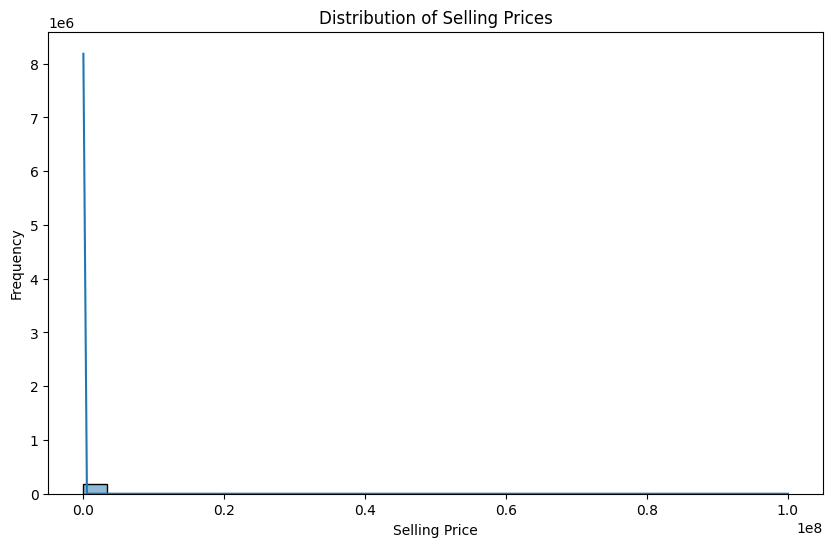

In [3]:
# Visualize the distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

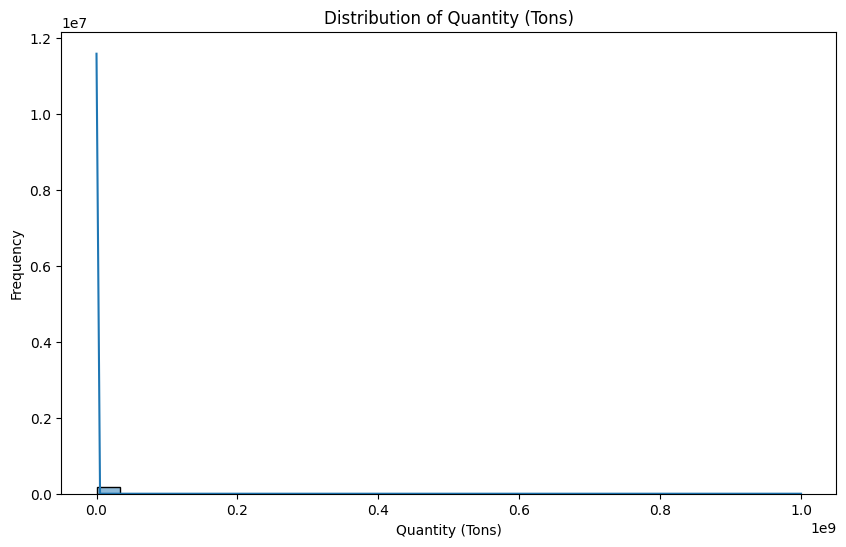

In [4]:
# Visualize the distribution of quantity (Tons)
plt.figure(figsize=(10, 6))
sns.histplot(data['quantity tons'], kde=True, bins=30)
plt.title('Distribution of Quantity (Tons)')
plt.xlabel('Quantity (Tons)')
plt.ylabel('Frequency')
plt.show()

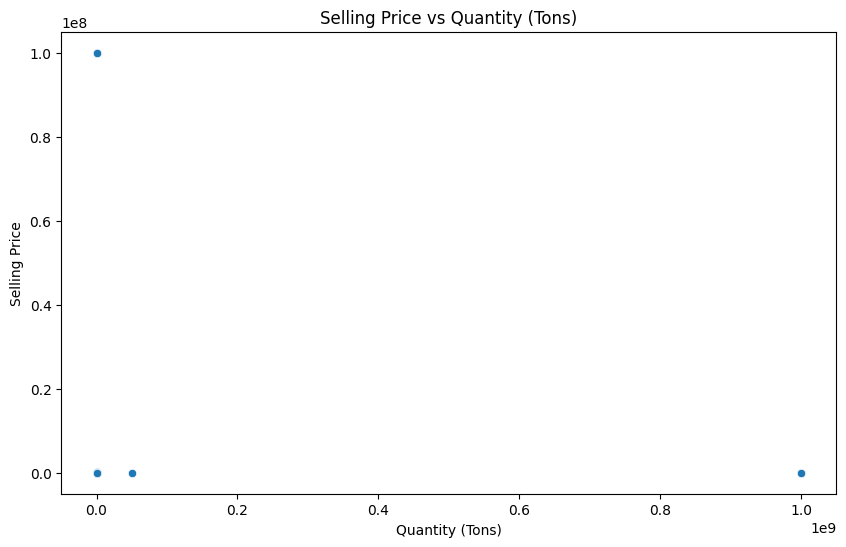

In [5]:
# Scatter plot of selling price vs quantity (Tons)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity tons', y='selling_price', data=data)
plt.title('Selling Price vs Quantity (Tons)')
plt.xlabel('Quantity (Tons)')
plt.ylabel('Selling Price')
plt.show()

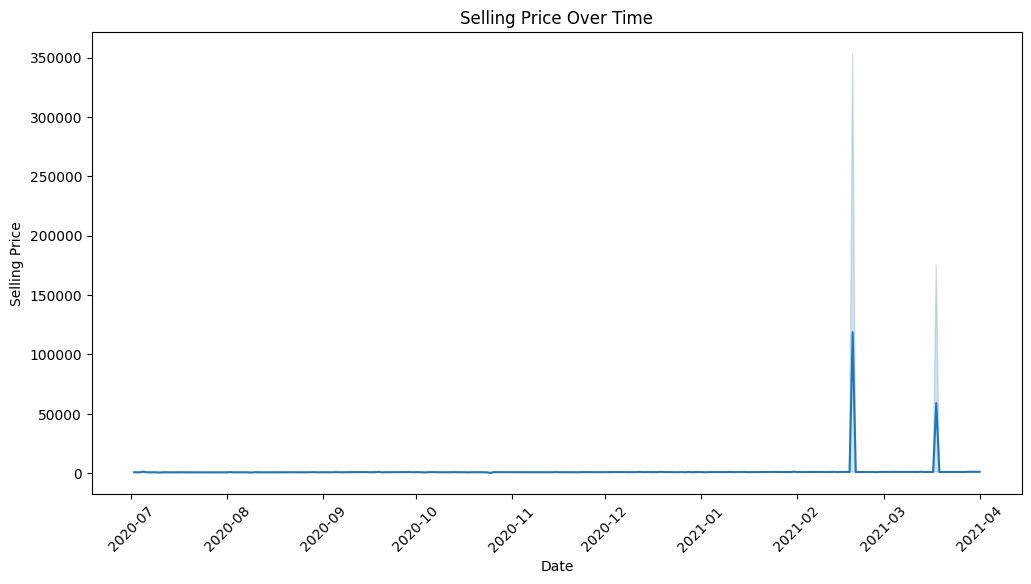

In [6]:
data['item_date'] = pd.to_datetime(data['item_date'])  # Ensure the date column is in datetime format
plt.figure(figsize=(12, 6))
sns.lineplot(x='item_date', y='selling_price', data=data)
plt.title('Selling Price Over Time')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

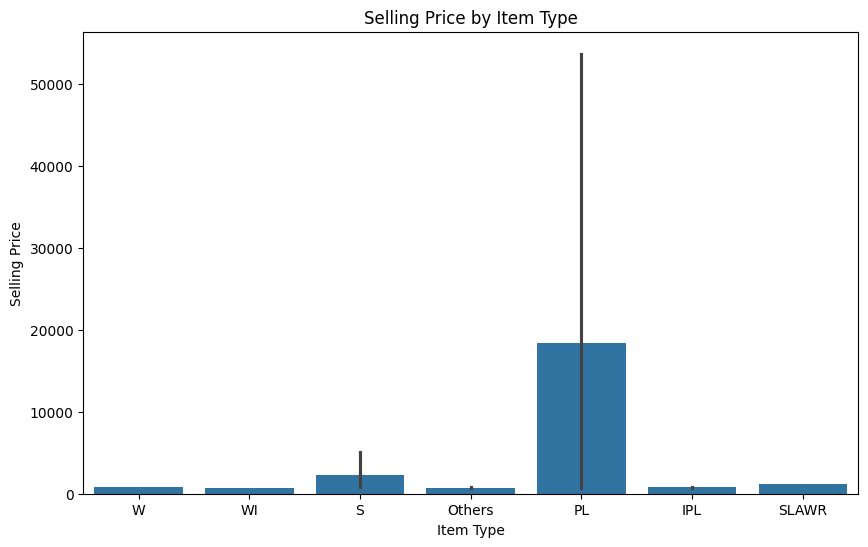

In [8]:
# Boxplot of Selling Price by Item Type
plt.figure(figsize=(10, 6))
sns.barplot(x='item type', y='selling_price', data=data)
plt.title('Selling Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Selling Price')
plt.show()

C:\Users\siva Bharathi\AppData\Local\Temp\ipykernel_16228\775728462.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data.groupby(['thickness_bin', 'width_bin'])['selling_price'].mean().unstack()


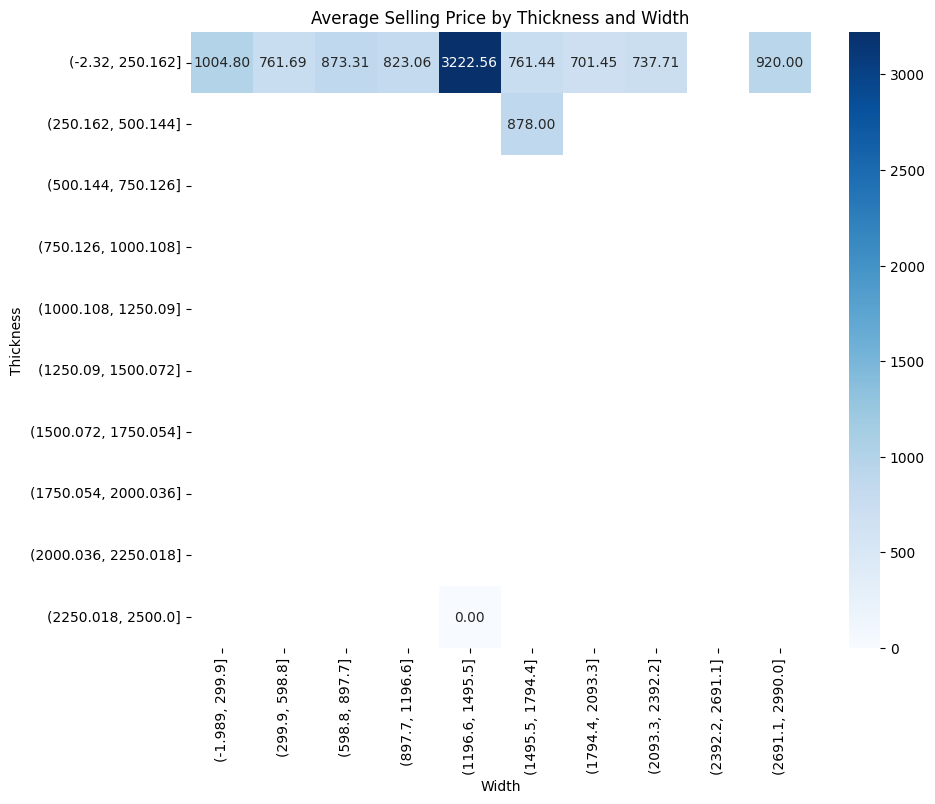

In [4]:
# Heatmap: Thickness vs Width and Selling Price
# We'll bin thickness and width to create a heatmap
data['thickness_bin'] = pd.cut(data['thickness'], bins=10)
data['width_bin'] = pd.cut(data['width'], bins=10)
heatmap_data = data.groupby(['thickness_bin', 'width_bin'])['selling_price'].mean().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues')
plt.title('Average Selling Price by Thickness and Width')
plt.xlabel('Width')
plt.ylabel('Thickness')
plt.show()

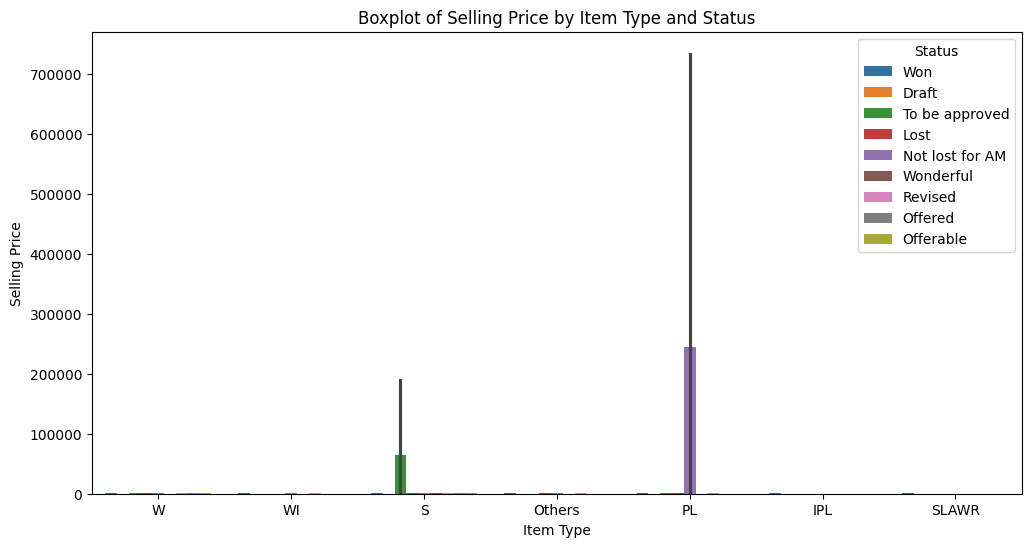

In [7]:
# Boxplot: Item Type and Status vs Selling Price
plt.figure(figsize=(12, 6))
sns.barplot(x='item type', y='selling_price', hue='status', data=data)
plt.title('Boxplot of Selling Price by Item Type and Status')
plt.xlabel('Item Type')
plt.ylabel('Selling Price')
plt.legend(title='Status')
plt.show()

To visualize outliers and skewness

In [9]:
eda_data= pd.read_csv("C:/Users/siva Bharathi/OneDrive/Desktop/Python/cleaned_copper_data.csv")
eda_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


C:\Users\siva Bharathi\AppData\Local\Temp\ipykernel_16228\2733310841.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
C:\Users\siva Bharathi\AppData\Local\Temp\ipykernel_16228\2733310841.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1

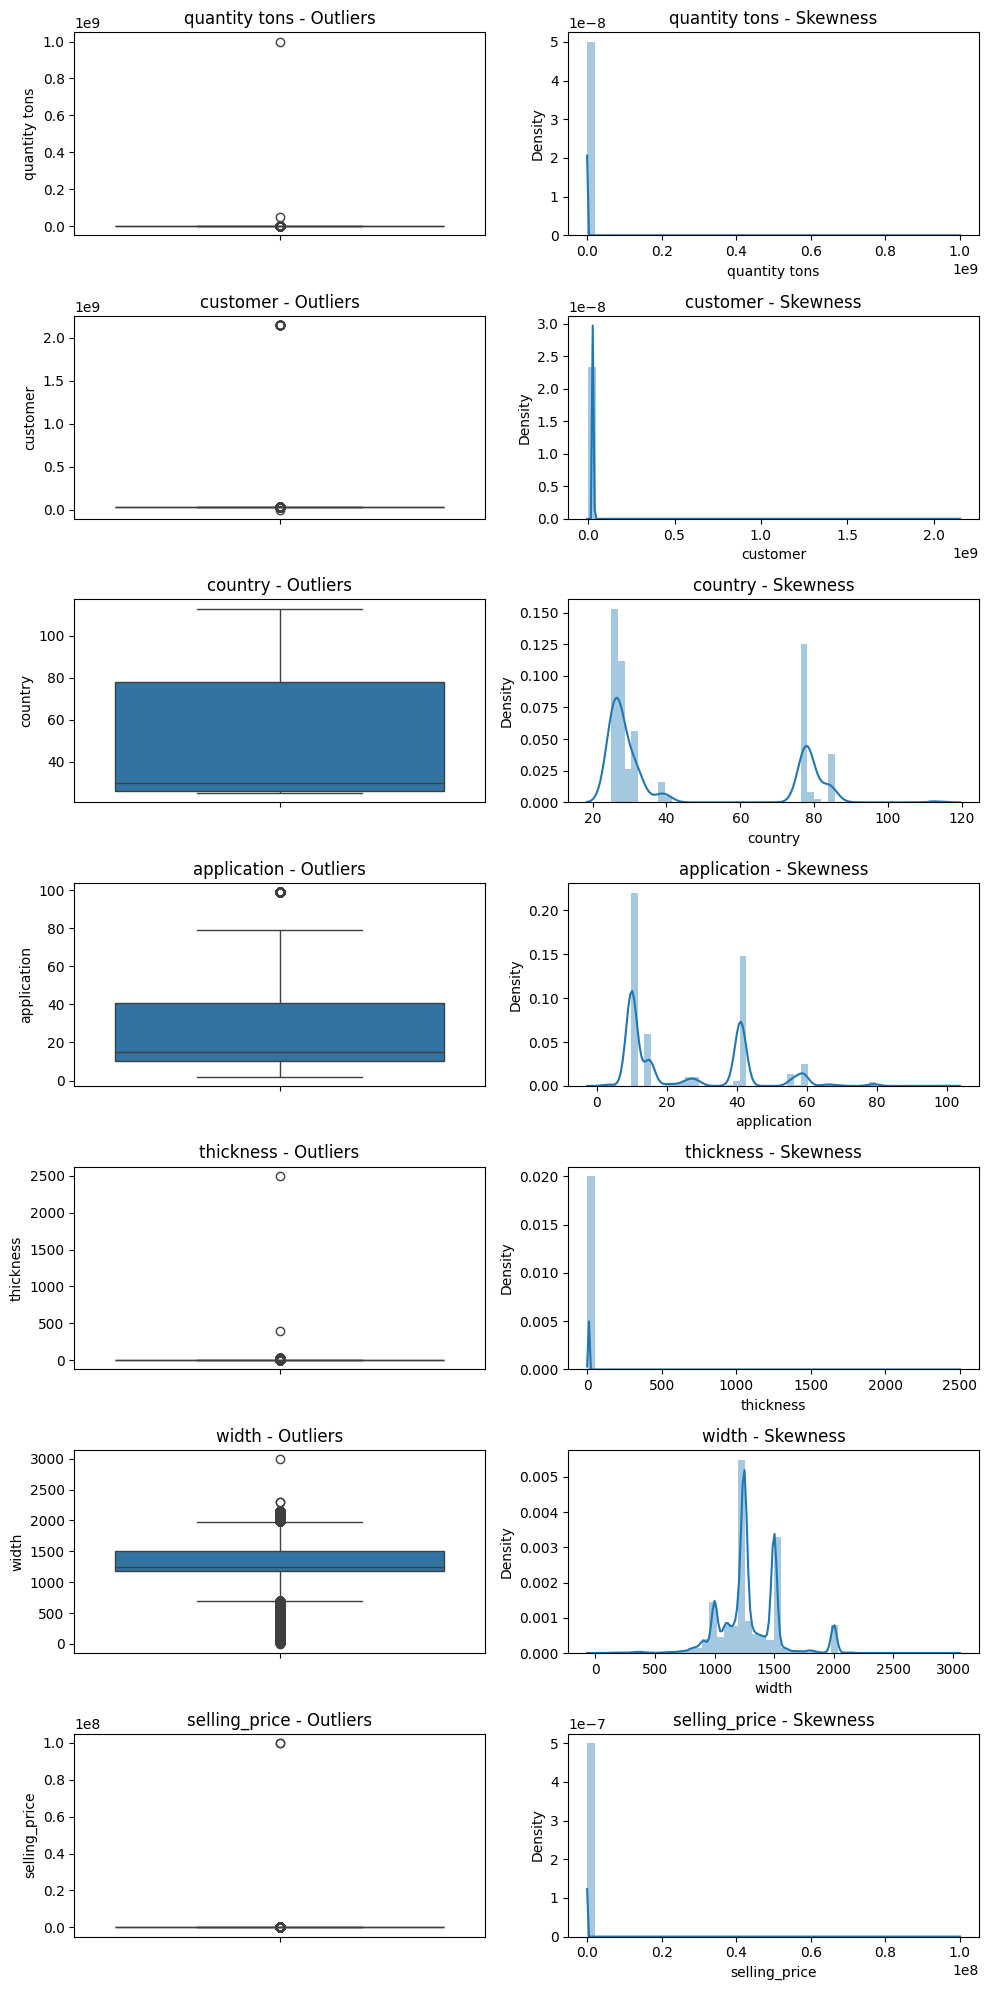

In [10]:
fig, axes = plt.subplots(7, 2, figsize=(10,20))

sns.boxplot(ax=axes[0, 0], data=eda_data['quantity tons'])      #quantity tons
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')

sns.boxplot(ax=axes[1, 0], data=eda_data['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=eda_data['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=eda_data['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=eda_data['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=eda_data['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=eda_data['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=eda_data['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=eda_data['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=eda_data['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=eda_data['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=eda_data['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()